In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [5]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [6]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]
X_test = test.iloc[:, 0:784]

In [7]:
X_tsn = X/255
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_res = tsne.fit_transform(X_tsn)

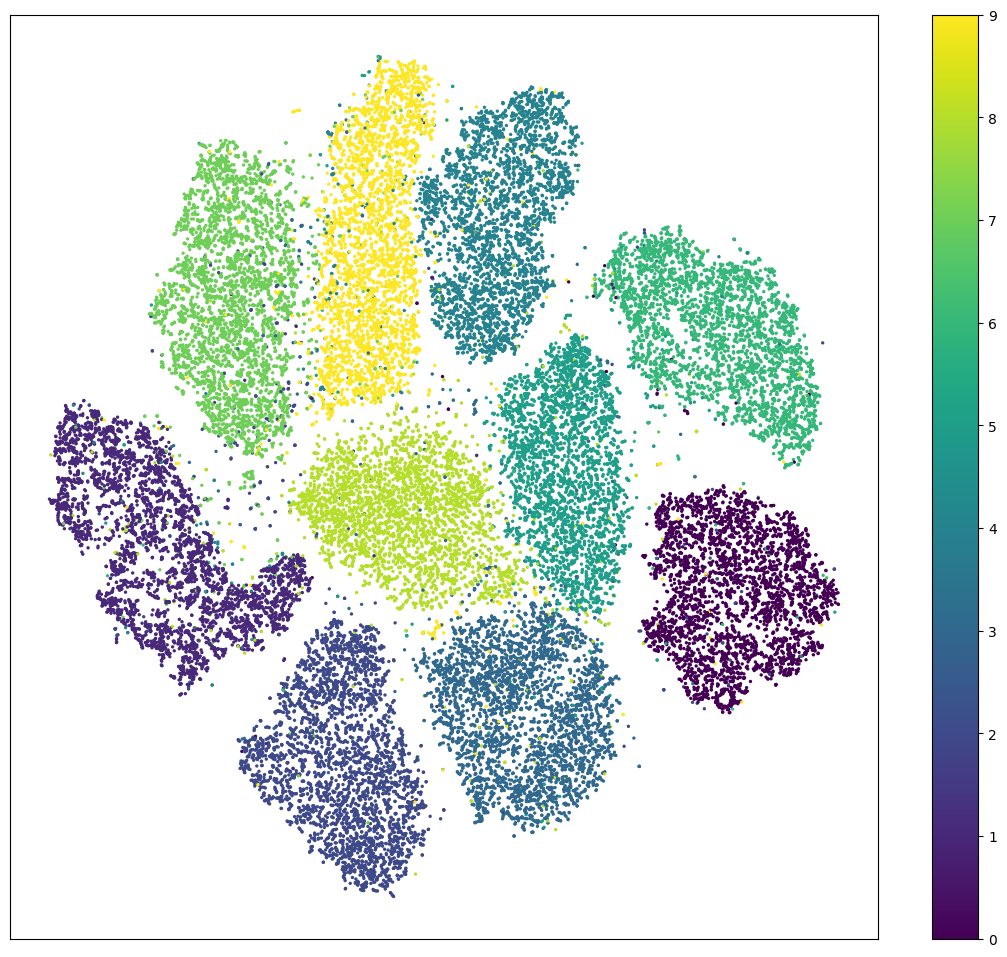

In [8]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

In [10]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [11]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [12]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [13]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [14]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


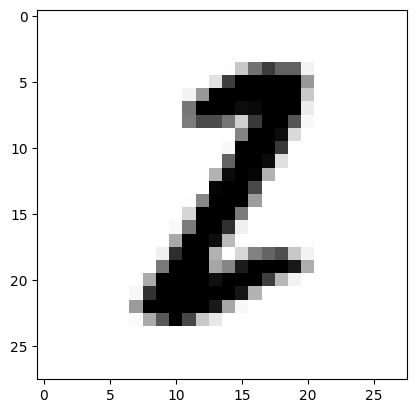

In [15]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

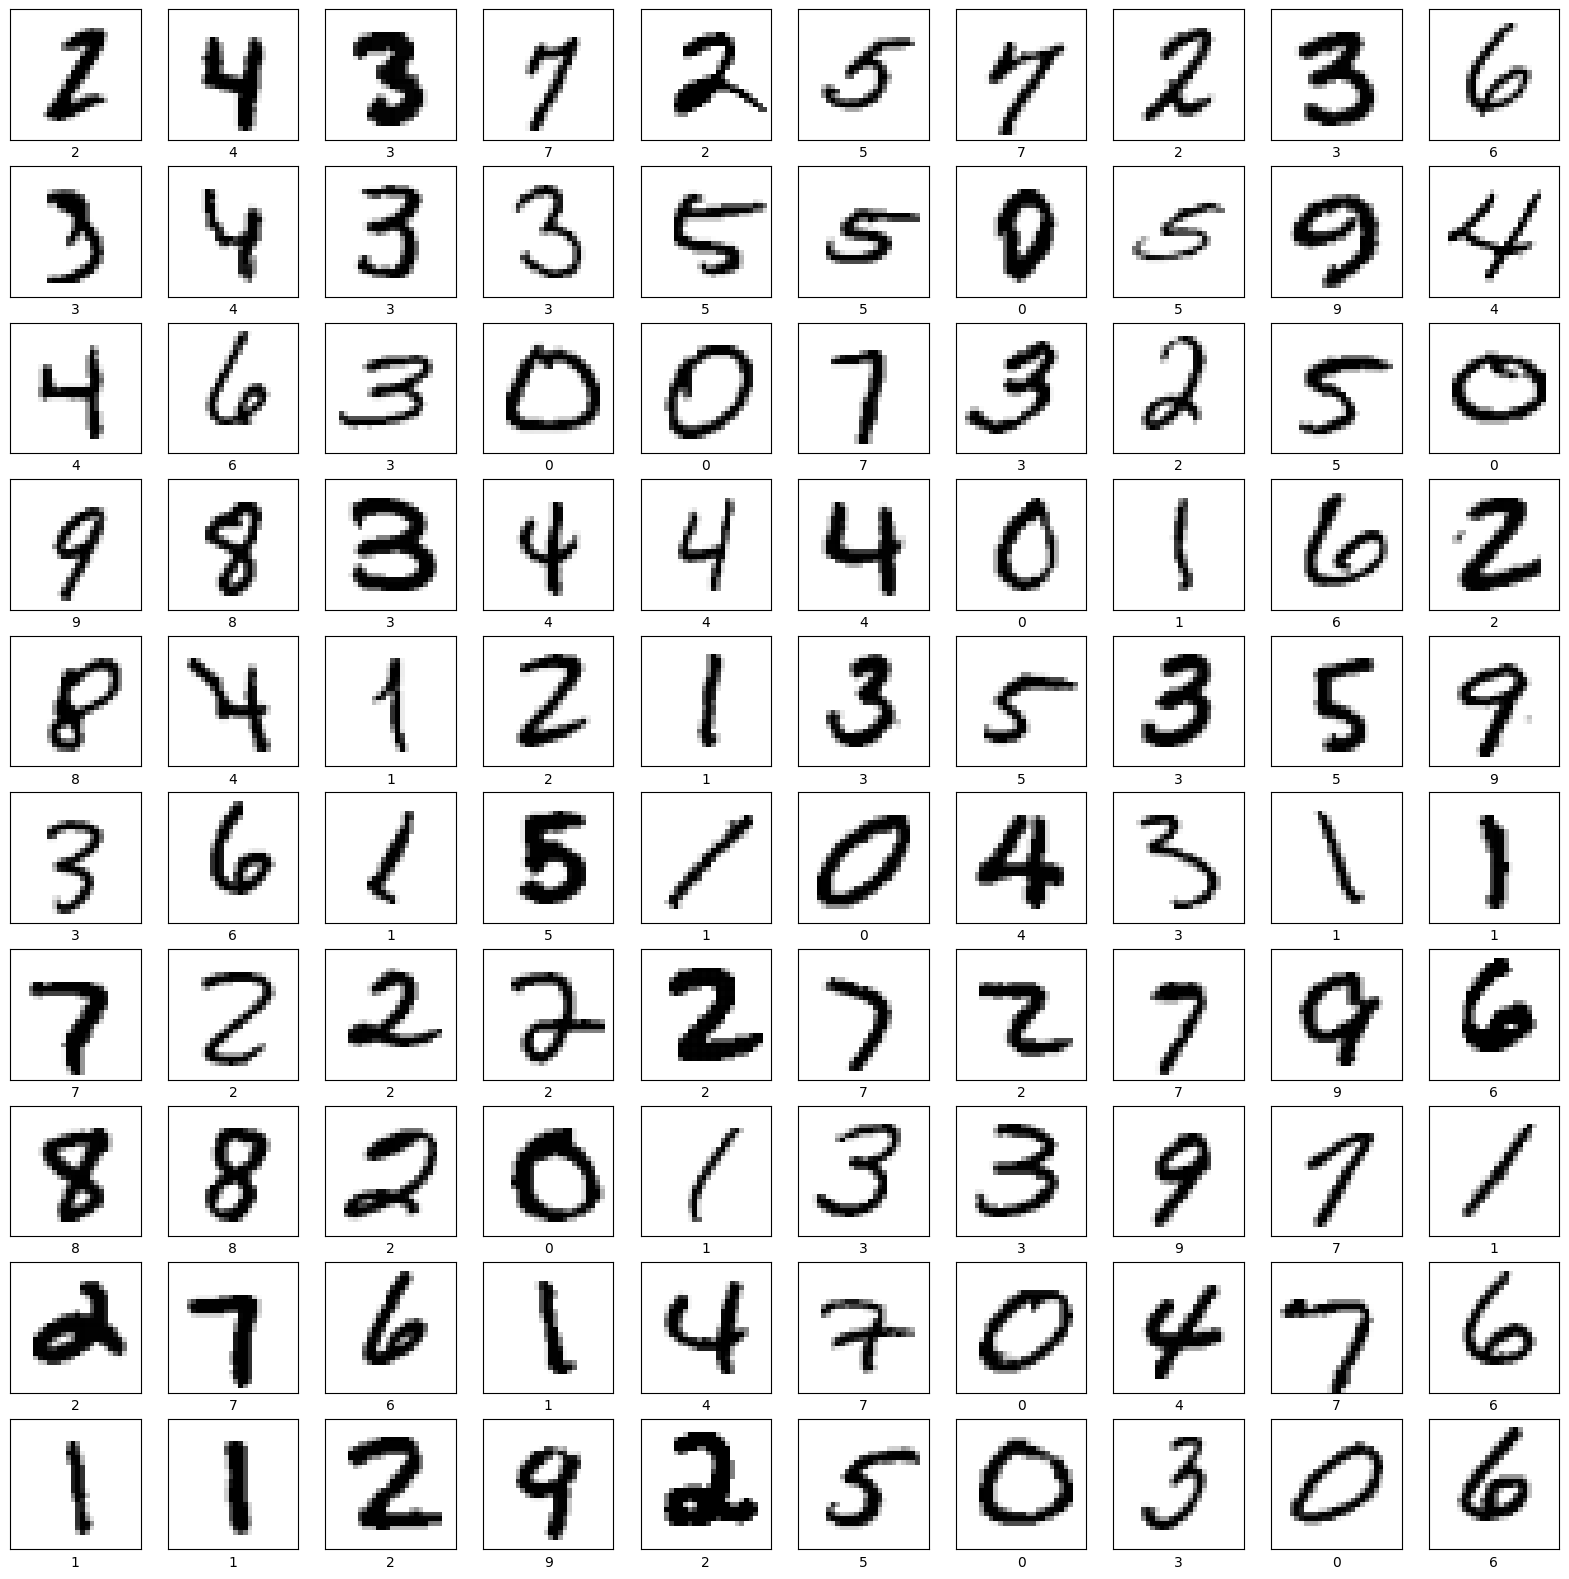

In [16]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

In [17]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [18]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


In [19]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [20]:
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [21]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

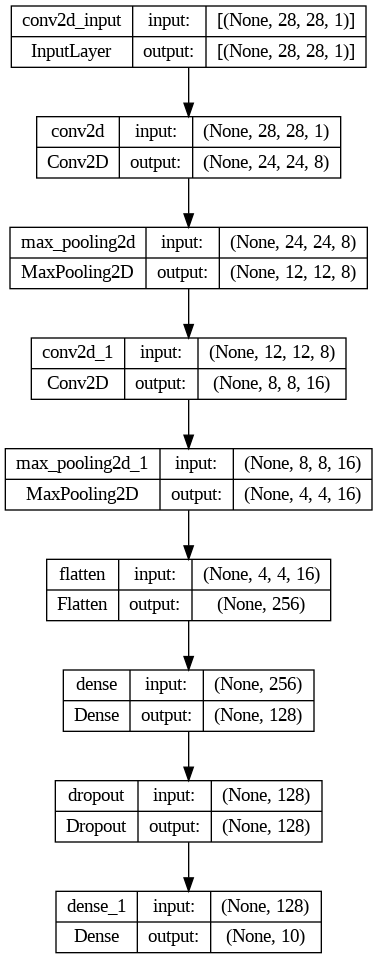

In [23]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [24]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [25]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 22s 19ms/step - loss: 0.2835 - accuracy: 0.9134 - val_loss: 0.0988 - val_accuracy: 0.9689
Epoch 2/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0918 - accuracy: 0.9711 - val_loss: 0.0663 - val_accuracy: 0.9807
Epoch 3/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0685 - accuracy: 0.9785 - val_loss: 0.0542 - val_accuracy: 0.9848
Epoch 4/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0536 - accuracy: 0.9831 - val_loss: 0.0466 - val_accuracy: 0.9861
Epoch 5/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0443 - accuracy: 0.9858 - val_loss: 0.0516 - val_accuracy: 0.9848
Epoch 6/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0381 - accuracy: 0.9873 - val_loss: 0.0435 - val_accuracy: 0.9876
Epoch 7/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0467 -

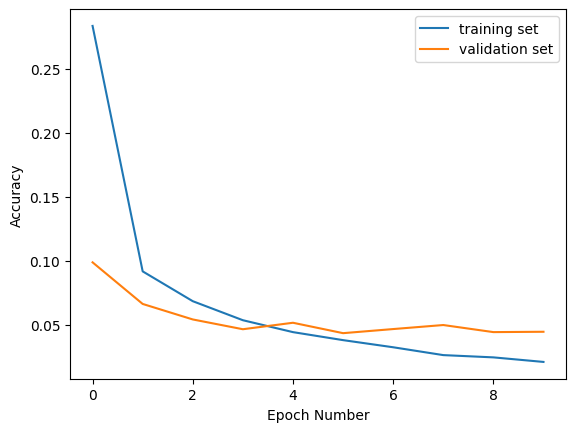

In [26]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

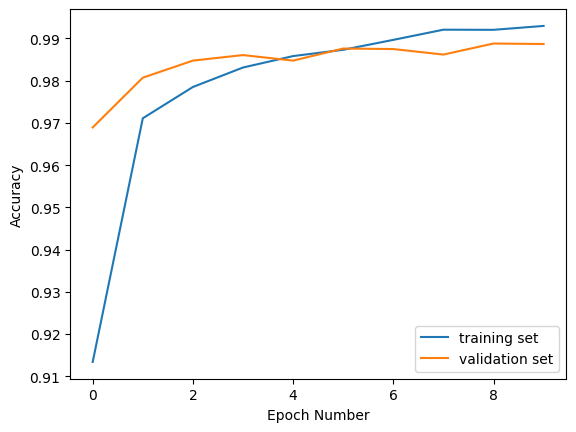

In [27]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [28]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

In [29]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.009665264748036861
Train accuracy:  0.9972618818283081


In [30]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [31]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04459872096776962
Validation accuracy:  0.9886904954910278


In [32]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
loaded_model = tf.keras.models.load_model(model_name)

In [34]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 2s 6ms/step


In [35]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [36]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.532233e-07,9.999976e-01,1.248614e-07,2.950532e-10,8.954934e-08,1.543826e-09,9.931966e-08,5.775777e-08,1.652698e-06,1.780805e-08
1,2.485906e-14,1.130554e-10,2.833598e-12,9.999997e-01,1.484695e-16,2.020369e-07,1.684687e-14,1.751352e-12,2.755105e-08,1.350393e-08
2,2.138674e-11,2.007343e-08,1.593725e-08,4.770045e-07,1.360617e-11,3.869500e-07,2.100994e-09,5.837840e-11,9.999985e-01,5.161964e-07
3,1.378458e-08,9.999972e-01,2.182533e-08,1.618319e-10,9.416984e-07,7.384461e-10,1.711049e-08,4.384333e-08,1.717659e-06,3.740326e-08
4,1.645012e-14,2.967898e-15,5.595578e-12,5.305783e-09,2.102172e-08,6.576171e-12,5.147545e-17,2.142260e-08,2.138245e-06,9.999978e-01
...,...,...,...,...,...,...,...,...,...,...
8395,6.939171e-17,3.406486e-15,1.276899e-14,5.451083e-18,9.999999e-01,2.006635e-14,8.634600e-14,2.052318e-17,5.545183e-13,7.025487e-12
8396,2.819860e-10,4.422381e-14,7.967521e-15,5.849518e-09,5.689193e-14,9.999987e-01,1.243235e-06,2.952227e-16,1.056024e-08,2.871488e-13
8397,2.725781e-13,5.674766e-10,8.198630e-12,2.483436e-11,1.777630e-08,3.587942e-10,1.573636e-13,9.999999e-01,2.753953e-10,5.376856e-08
8398,2.666720e-09,6.579089e-14,4.633477e-12,1.467336e-10,1.402974e-11,5.325751e-08,9.999999e-01,1.205011e-16,5.054623e-09,9.452012e-14


In [37]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


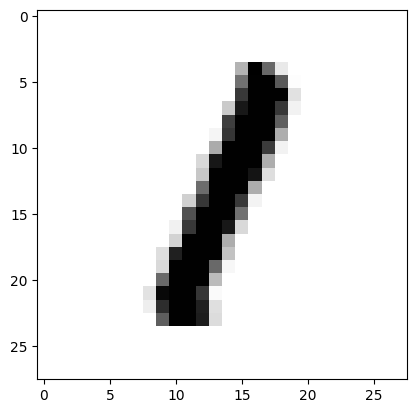

In [38]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

<ipython-input-39-f15184e95b81>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


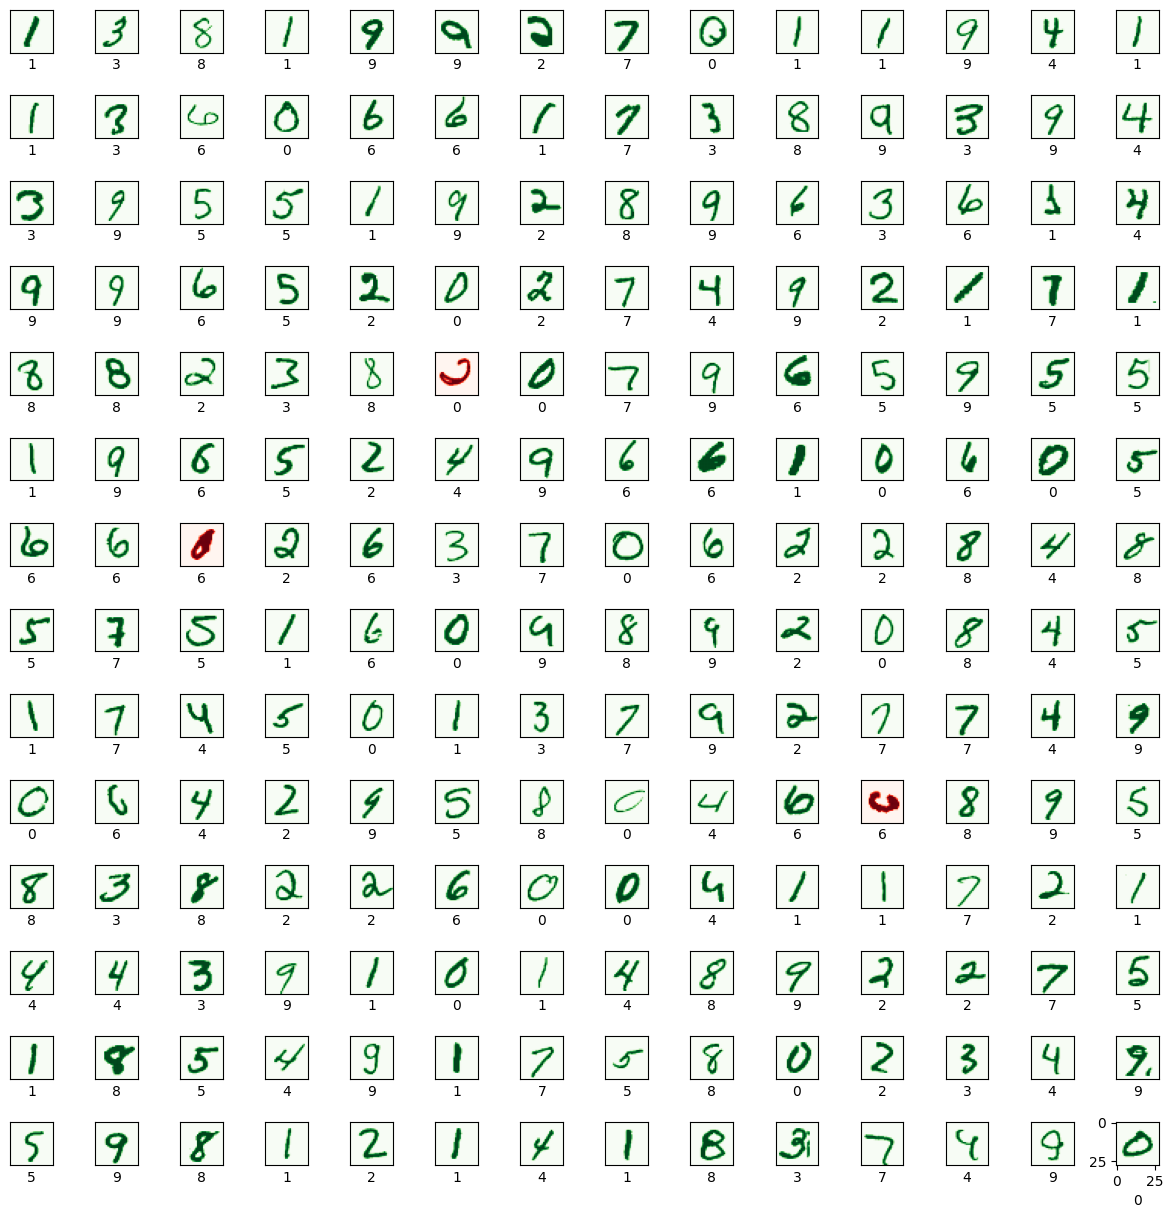

In [39]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()


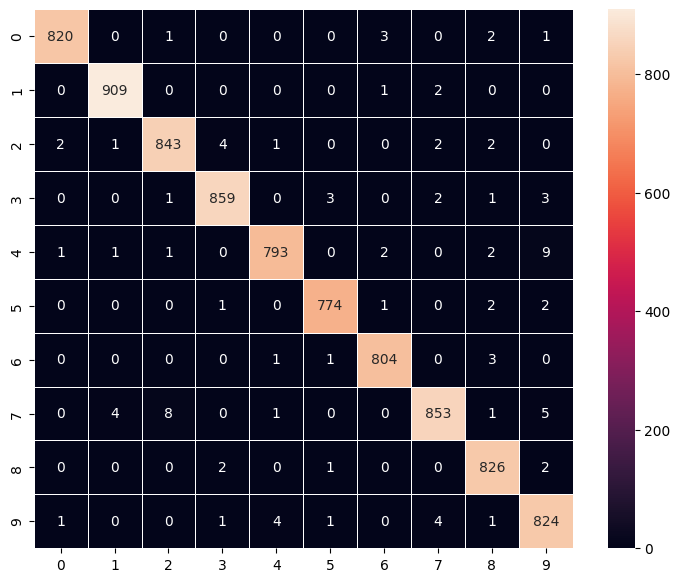

In [40]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [41]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 5s 6ms/step
predictions_one_hot: (28000, 10)


In [42]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.072328e-11,2.198198e-11,9.999999e-01,7.492654e-12,2.669553e-14,2.912585e-17,8.640687e-16,2.779320e-09,1.321930e-11,2.487169e-13
1,9.999973e-01,1.850080e-13,1.570793e-09,2.414573e-11,2.885348e-12,2.265424e-07,2.298621e-07,1.454651e-08,1.700318e-09,2.169844e-06
2,5.933900e-12,1.093666e-11,2.480898e-09,5.049742e-08,2.087791e-05,6.292653e-11,8.114322e-14,5.991361e-10,3.310247e-06,9.999756e-01
3,5.234688e-04,9.310299e-11,7.172624e-05,5.274547e-05,1.220402e-06,1.281242e-07,9.825894e-07,1.052230e-07,7.694669e-04,9.985801e-01
4,8.347116e-18,3.946276e-11,4.596764e-11,9.999999e-01,9.897667e-19,3.343415e-12,5.954482e-17,3.901704e-12,1.141010e-08,2.737182e-12
...,...,...,...,...,...,...,...,...,...,...
27995,1.381194e-15,3.243870e-19,1.018268e-13,1.330975e-11,1.323246e-09,9.099955e-14,5.618477e-19,2.465498e-10,5.221755e-08,9.999999e-01
27996,9.284349e-10,1.388304e-09,1.444315e-06,6.212598e-07,1.938088e-07,1.425859e-09,1.616710e-11,9.991313e-01,3.704403e-10,8.663190e-04
27997,1.225857e-22,1.207957e-15,1.916740e-17,9.999999e-01,3.646466e-22,1.503340e-13,1.830957e-23,8.497130e-15,3.108297e-11,7.049312e-12
27998,1.154945e-11,1.528491e-13,1.254311e-09,9.516417e-09,1.290983e-07,3.283484e-12,5.374468e-15,7.977012e-09,5.929052e-09,9.999998e-01


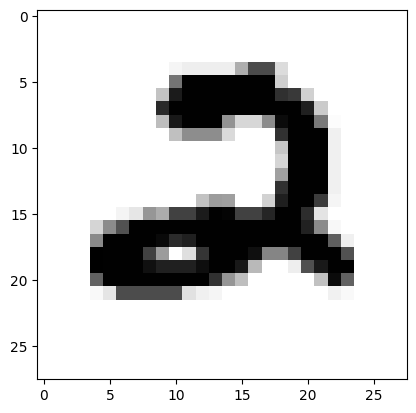

In [43]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [44]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 7s 8ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [45]:
test_pred.to_csv('submission.csv', index = False)